## Jacob Sycoff

# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [1]:
%matplotlib inline

import pandas as pd
import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [5]:
#These are some functions created for formatting
def bold_print(*args):
    start = "\033[1m"
    end = "\033[0;0m"
    string = ''
    for i in range(len(args)):
        element = args[i]
        if type(element) != str:
            element = str(element)
        string+= element+' '
    print(start+string+end)
    
def proj_section_header(num):
    '''input project part number and this function will output a standardized heading for that project part'''
    bold_print('Project Part',str(num),':') 
    print('~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()
    print()
    
def header(text):
    bold_print(text)
    print()

def sub_header(text):
    bold_print(text)
    print('---------------------------------------------------')

def end_section():
    print('-------------------------------------------------------------------------------------------------------------------')
    print()
    print()

### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

Project Part 1 : 
~~~~~~~~~~~~~~~~~~~~~~~~~


Fraction of the total variance in the training data explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50], is shown: 

 number_of_components(K)  fraction_of_total_variance_in_training_data_explained
                       1                                               0.164043
                       2                                               0.297278
                       3                                               0.399013
                       4                                               0.469646
                       5                                               0.508313
                      10                                               0.652211
                      20                                               0.808892
                      30                                               0.898376
                      40                                               0.9509

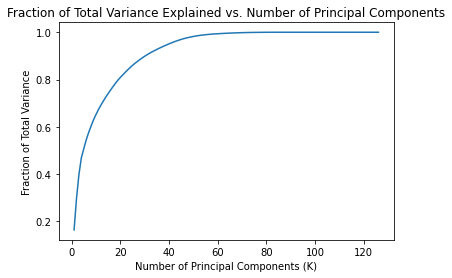

In [6]:
def P1():

### STUDENT START ###
    def var_vs_k_df():
        k_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
        pct_explained = []
        for k in k_list:
            pca = PCA(n_components=k)
            pca.fit(train_data)
            pct_explained.append(np.sum(pca.explained_variance_ratio_))
        total_var_vs_k = pd.DataFrame({'number_of_components(K)':k_list, 'fraction_of_total_variance_in_training_data_explained':pct_explained})
        return total_var_vs_k
    def var_vs_k_graph():
        pca = PCA()
        pca.fit(train_data)
        chart_k_vals = []
        frac_explained = []
        exp_var_ratio = pca.explained_variance_ratio_
        for k in range(len(exp_var_ratio)):
            chart_k_vals.append(k+1)
            frac_explained.append(sum(exp_var_ratio[:k+1]))
        plt.plot(chart_k_vals,frac_explained)
        plt.xlabel('Number of Principal Components (K)')
        plt.ylabel('Fraction of Total Variance')
        plt.title('Fraction of Total Variance Explained vs. Number of Principal Components')
    proj_section_header(1)
    header('Fraction of the total variance in the training data explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50], is shown:')
    print (var_vs_k_df().to_string(index=False))
    end_section()
    header('A lineplot of fraction of total variance vs. number of principal components is shown, for all possible numbers of principal components:')
    return var_vs_k_graph()
    ### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

Project Part 2 : 
~~~~~~~~~~~~~~~~~~~~~~~~~


Data is projected down to 2 dimensions with PCA and shown as a square scatterplot:  

Note: Red = Poisonous, Green = Non-poisonous 


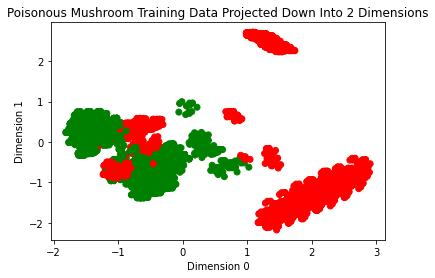

In [7]:
def P2():

### STUDENT START ###
    proj_section_header(2)
    header("Data is projected down to 2 dimensions with PCA and shown as a square scatterplot: ")
    #Data is projected down to 2 dimensions with PCA
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    train_data_pca_dimension_0 = [i[0] for i in train_data_pca]
    train_data_pca_dimension_1 = [i[1] for i in train_data_pca]

    #color is specified for each training example
    pois = []
    for i in range(len(train_labels)):
        if train_labels[i] == 0:
            pois.append('green')
        elif train_labels[i] == 1:
            pois.append('red')

    #data is plotted and color coded
    plt.scatter(train_data_pca_dimension_0,train_data_pca_dimension_1, color = pois)
    plt.title('Poisonous Mushroom Training Data Projected Down Into 2 Dimensions')
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    bold_print('Note: Red = Poisonous, Green = Non-poisonous')
### STUDENT END ###


P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

Project Part 3 : 
~~~~~~~~~~~~~~~~~~~~~~~~~




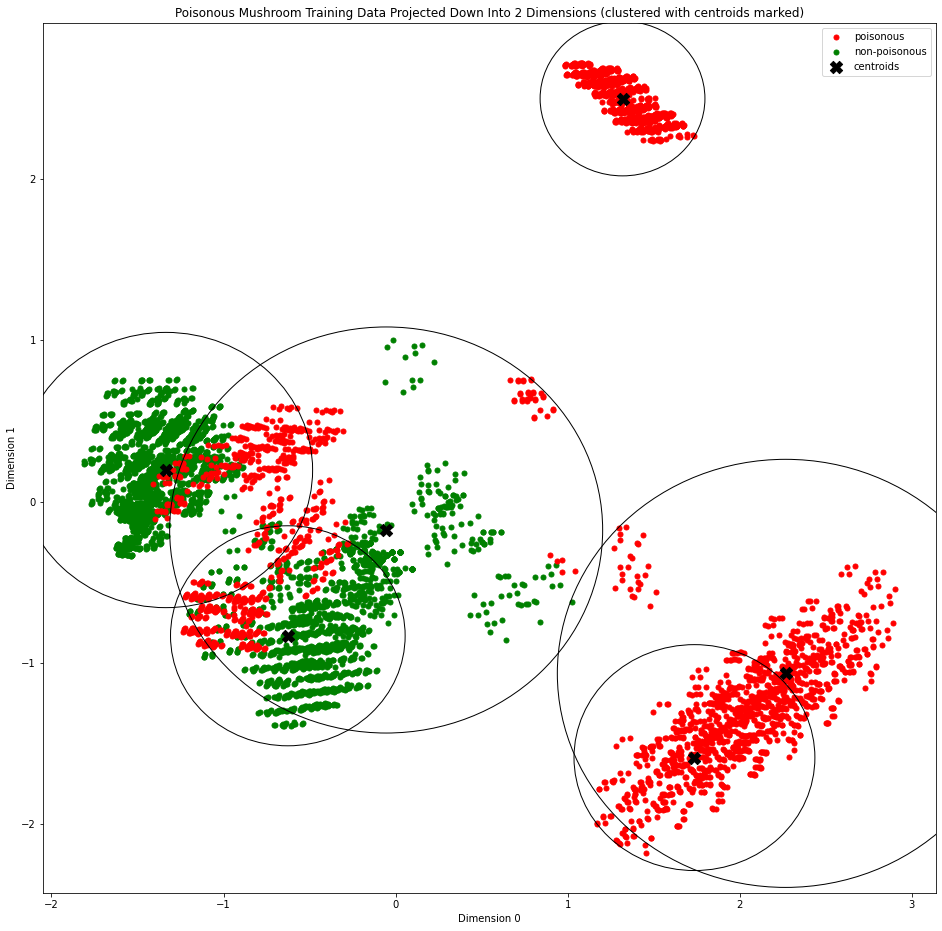

In [8]:
def P3():

### STUDENT START ###
    proj_section_header(3)

    #Data is projected down to 2 dimensions with PCA
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    k_clust = KMeans(n_clusters=6, random_state = 0).fit(train_data_pca)

    #separate data into positive and negative
    pos = [train_data_pca[i] for i in range(len(train_data_pca)) if train_labels[i]==1]
    neg = [train_data_pca[i] for i in range(len(train_data_pca)) if train_labels[i]==0]
    
    #calculate the two dimensions for both positive and negative data
    positive_dimension_0 = [i[0] for i in pos]
    positive_dimension_1 = [i[1] for i in pos]
    neg_dim_0 = [i[0] for i in neg]
    neg_dim_1 = [i[1] for i in neg]
    
    #find the centers of the clusters
    centers = k_clust.cluster_centers_
    centers_0 = [i[0] for i in centers]
    centers_1 = [i[1] for i in centers]
    k_means_labels = k_clust.labels_

    # separate pca train data into their clusters 
    clusters = [[] for i in range(6)]
    for i in range(6):
            for j in range(len(train_data_pca)):
                if k_means_labels[j]==i:
                    clusters[i].append(train_data_pca[j])
                    
    #calculate the distance betwen each point and the center of its cluster
    clusters_of_dists = [[] for i in range(6)]
    for cluster in range(len(clusters)):
        for point in clusters[cluster]:
            dist = np.linalg.norm(point - centers[cluster])
            clusters_of_dists[cluster].append(dist) 
            
    #get the index, for each cluster, of the distance between the center of the cluster and its furthest constituent
    indices_of_maxes = []
    for i in range(6):
        indices_of_maxes.append(np.argmax(clusters_of_dists[i]))
    biggest_dist_per_cluster = []

    #get largest distance per cluster (this step and the step before it are inefficient,
    #but are vestiges of a prior approach)
    for i in range(6):
        ind_of_max = indices_of_maxes[i]
        cluster_dist = clusters_of_dists[i]
        biggest_dist_per_cluster.append(cluster_dist[ind_of_max])

    #set figure size
    plt.rcParams["figure.figsize"] = (16,16)

    #plot positve/poisonous and negative/non-poisonous data
    non_pois = plt.scatter(neg_dim_0,neg_dim_1, color = 'green', s=25)
    pois = plt.scatter(positive_dimension_0,positive_dimension_1, color = 'red', s=25)
    
    #plot the centers of each cluster and mark them with an X
    center_plot = plt.scatter(centers_0,centers_1, color = 'black', marker='X', s=150)
    
    #plot the circles for each cluster center at the centroid and that goes through the cluster's point furthest
    #from the centroid
    ax = None
    for i in range(6):
        circ = Circle(xy=(centers_0[i],centers_1[i]),radius=biggest_dist_per_cluster[i])
        if ax is None:
            ax = plt.gca()
        ax.add_artist(circ)
        circ.set_clip_box(ax.bbox)
        circ.set_edgecolor('black')
        circ.set_facecolor('none') 
        circ.set_alpha(1)
    
    #add a legend, title, x axis label, and y axis label to the plot
    plt.legend((pois,non_pois,center_plot),('poisonous','non-poisonous','centroids'))
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Poisonous Mushroom Training Data Projected Down Into 2 Dimensions (clustered with centroids marked)')
    plt.show()


### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* Use`GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* Use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* `contour` can be used without the `norm` and `levels` parameters. 

Project Part 4 : 
~~~~~~~~~~~~~~~~~~~~~~~~~


Plots of estimated density contours are shown for various gaussian mixture models: 



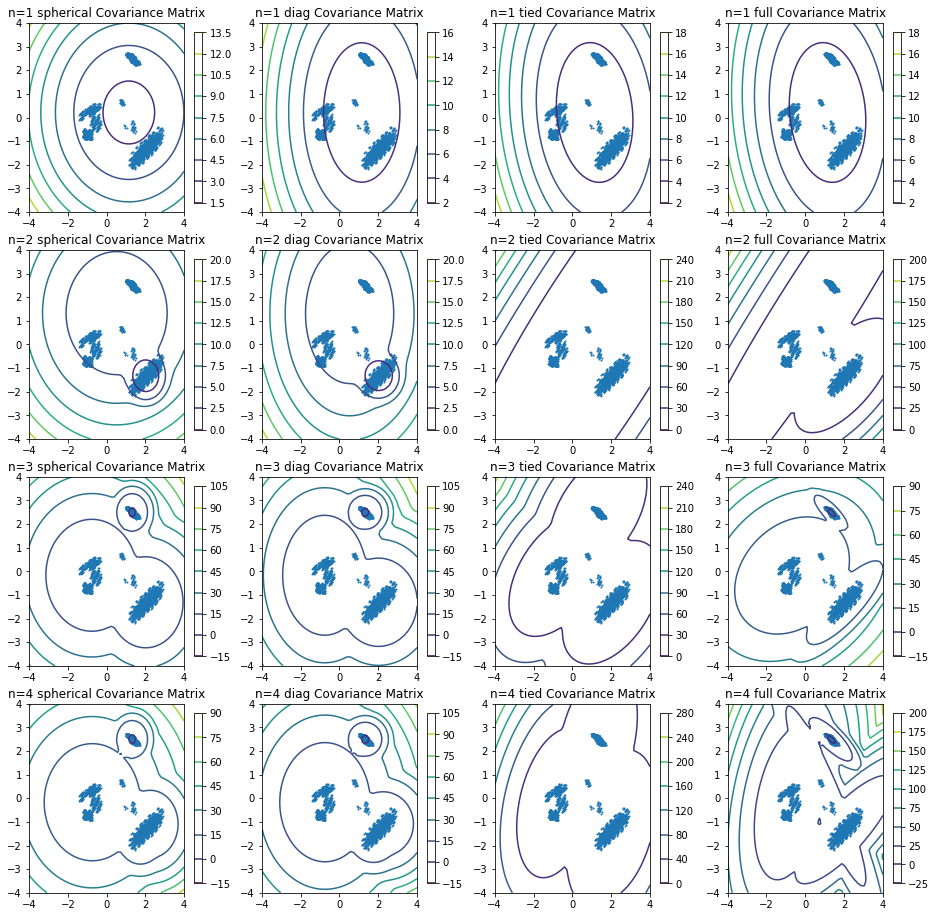

In [9]:
def P4():

### STUDENT START ###
    proj_section_header(4)
    header("Plots of estimated density contours are shown for various gaussian mixture models:")
    
    #Data is projected down to 2 dimensions with PCA
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    pos = [train_data_pca[i] for i in range(len(train_data_pca)) if train_labels[i]==1]
    pos_dim_0 = [i[0] for i in pos]
    pos_dim_1 = [i[1] for i in pos]
    
    #A function that creates a square plot of the entimated density contours
    def one_gaussian_countour_plot(model, n, cov_type):
        '''This function plots one contour plot for a gaussian model'''
        x = np.linspace(-4., 4.)
        y = np.linspace(-4., 4.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -model.score_samples(XX)
        Z = Z.reshape(X.shape)

        CS = plt.contour(X, Y, Z)
        CB = plt.colorbar(CS, shrink=0.9)
        plot = plt.scatter(pos_dim_0, pos_dim_1, 1)

        plt.title('n='+str(n)+' '+ cov_type+' Covariance Matrix')
        plt.axis('tight')
        return plot



    #create 16 plots with varied n and covariance matrix type using the above function
    cov_mat_type_list = ['spherical', 'diag', 'tied', 'full']
    num_call = 1
    for n_comp in range(1,5):
        for cov_matrix_type in cov_mat_type_list:
            gm = GaussianMixture(n_components=n_comp, covariance_type=cov_matrix_type, random_state=12345)
            gm.fit(pos)
            plt.subplot(4,4,num_call)
            one_gaussian_countour_plot(gm, n_comp, cov_matrix_type)
            num_call+=1
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* `GaussianMixture`'s `score_samples` method to find the probabilities.

In [10]:
def P5():

### STUDENT START ###
    proj_section_header(5)

    # use PCA to project data onto 2 dimensions
    pca = PCA(n_components=2)
    train_data_pca = pca.fit_transform(train_data)
    test_data_pca = PCA(n_components=2).fit_transform(test_data)
    
    #separate 2 dimensional data from above into positive and negative labels
    pos = [train_data_pca[i] for i in range(len(train_data_pca)) if train_labels[i]==1]
    neg = [train_data_pca[i] for i in range(len(train_data_pca)) if train_labels[i]==0]
    
    # create a gaussian model with 4 mixture components and full covariance for the positive 2d projected data
    positive_gaussian = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    positive_gaussian.fit(pos)    
    
    # create a gaussian model with 4 mixture components and full covariance for the negative 2d projected data
    negative_gaussian = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    negative_gaussian.fit(neg)
    
    # find weighted log probabilities for pca reduced 2 dimensional test_data for both positive and negative models
    probabilities_of_pos = positive_gaussian.score_samples(test_data_pca)
    probabilities_of_neg = negative_gaussian.score_samples(test_data_pca)
    
    # predict test example labels by picking the labels corresponding to the larger of the two models' probabilities
        #note that there are no equal probabilities between the two, but if there were, because of the danger of 
        #poisonous mushrooms, equal probabilities will be predicted as positive/poisonous
    preds = []
    for i in range(len(probabilities_of_pos)):
        if probabilities_of_pos[i] >= probabilities_of_neg[i]:
            preds.append(1)
        else:
            preds.append(0)
    #calculate accuracy
    accuracy = metrics.accuracy_score(test_labels,preds)
    print('The accuracy of predictions on the test data is: ', accuracy)
    print()
    end_section()
### STUDENT END ###

P5()

Project Part 5 : 
~~~~~~~~~~~~~~~~~~~~~~~~~


The accuracy of predictions on the test data is:  0.5088967971530249

-------------------------------------------------------------------------------------------------------------------




### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [11]:
def P6():

### STUDENT START ###

    proj_section_header(6)

    def one_gaussian_test(pos, neg, test_pca_reduced, n_pca, the_type, n_gmm):
        '''This fucntion takes the above parameters and outputs a list of parameters including newly calculated number of parameters and accuracy'''
        # create a gaussian model with 4 mixture components and full covariance for the positive 2d projected data
        positive_gaussian = GaussianMixture(n_components=n_gmm, covariance_type=the_type, random_state=12345)
        positive_gaussian.fit(pos)    

        # create a gaussian model with 4 mixture components and full covariance for the negative 2d projected data
        negative_gaussian = GaussianMixture(n_components=n_gmm, covariance_type=the_type, random_state=12345)
        negative_gaussian.fit(neg)

        # find weighted log probabilities for pca reduced 2 dimensional test_data for both positive and negative models
        probabilities_of_pos = positive_gaussian.score_samples(test_pca_reduced)
        probabilities_of_neg = negative_gaussian.score_samples(test_pca_reduced)

        # predict test example labels by picking the labels corresponding to the larger of the two models' probabilities
            #note that there are no equal probabilities between the two, but if there were, because of the danger of 
            #poisonous mushrooms, equal probabilities will be predicted as positive/poisonous
        preds = []
        for i in range(len(probabilities_of_pos)):
            if probabilities_of_pos[i] >= probabilities_of_neg[i]:
                preds.append(1)
            else:
                preds.append(0)
        #calculate accuracy
        accuracy = metrics.accuracy_score(test_labels,preds)

        #calculate number of parameters
        n_classes = 2
        if the_type == 'full':
            num_parameters = (n_pca*n_gmm + n_pca*(n_pca + 1)/ 2 * n_gmm) * n_classes
        elif the_type == 'diag':
            num_parameters = (n_pca*n_gmm + n_pca * n_gmm) * n_classes
        elif the_type == 'spherical':
            num_parameters = (n_pca*n_gmm + n_gmm) * n_classes
        elif the_type == 'tied':
            num_parameters = (n_pca*n_gmm + n_pca*(n_pca + 1)/ 2) * n_classes

        #create list of values to return
        return_list = [the_type, n_pca, n_gmm, num_parameters, accuracy]

        return return_list



    pca_nums = range(1,10)
    gmm_nums = range(1,10)
    cov_type = ['full','diag','spherical', 'tied']
    list_of_iterations = []
    for n_pca in pca_nums:
        pca_reduced = PCA(n_components=n_pca)
        train_pca_reduced = pca_reduced.fit_transform(train_data)
        test_pca_reduced = pca_reduced.transform(test_data)
        #separate 2 dimensional data from above into positive and negative labels
        pos = [train_pca_reduced[i] for i in range(len(train_pca_reduced)) if train_labels[i]==1]
        neg = [train_pca_reduced[i] for i in range(len(train_pca_reduced)) if train_labels[i]==0]
        for the_type in cov_type:
            for n_gmm in gmm_nums:
                list_of_iterations.append(one_gaussian_test(pos, neg, test_pca_reduced, n_pca, the_type, n_gmm))
    list_of_types = [iteration[0] for iteration in list_of_iterations]
    list_of_n_pca = [iteration[1] for iteration in list_of_iterations]
    list_of_n_gmm = [iteration[2] for iteration in list_of_iterations]
    list_of_num_parameters = [iteration[3] for iteration in list_of_iterations]
    list_of_accuracies = [iteration[4] for iteration in list_of_iterations]
    df = pd.DataFrame({'Covariance Type':list_of_types, 'Number of PCA Components':list_of_n_pca, 
                       'Number of GMM Components':list_of_n_gmm, 'Total Number of Parameters':list_of_num_parameters,
                       'Accuracy':list_of_accuracies})
    df_50_or_less_params = df[df['Total Number of Parameters']<=50]
    df_50_or_less_params = df_50_or_less_params.sort_values(by = 'Accuracy', ascending=False)
    
    bold_print('The following table shows the models tested (that have 50 or fewer parameters) and their specifications. It is sorted by accuracy. The models with the top 5 and bottom 5 accuracies are displayed:')
    print()
    return df_50_or_less_params


### STUDENT END ###

P6()

Project Part 6 : 
~~~~~~~~~~~~~~~~~~~~~~~~~


The following table shows the models tested (that have 50 or fewer parameters) and their specifications. It is sorted by accuracy. The models with the top 5 and bottom 5 accuracies are displayed: 



,Covariance Type,Number of PCA Components,Number of GMM Components,Total Number of Parameters,Accuracy
236,spherical,7,3,48.0,0.973310
190,diag,6,2,48.0,0.973310
235,spherical,7,2,32.0,0.971530
137,tied,4,3,44.0,0.969751
271,spherical,8,2,36.0,0.968861
...,...,...,...,...,...
27,tied,1,1,4.0,0.844306
0,full,1,1,4.0,0.844306
117,diag,4,1,16.0,0.843416
135,tied,4,1,28.0,0.816726
